## Chemical Reactor Analysis and Design Fundamentals - Rawlings and Ekerdt: Computational Appendix
This notebook is an attempt at python version of octave code from [computational appendix](http://jbrwww.che.wisc.edu/home/jbraw/chemreacfun/web-appendix.pdf).

### A1. Linear Algebra and Least Squares

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# stoichiometric matrix
stoi = np.array([[0,1,0,-1,-1,1],
                [-1,1,1,-1,0,0],
                [1,0,-1,0,-1,1]])
print(stoi)

# rank of stoichiometric matrix
rank = np.linalg.matrix_rank(stoi)
print('Rank of matrix is ',rank)

[[ 0  1  0 -1 -1  1]
 [-1  1  1 -1  0  0]
 [ 1  0 -1  0 -1  1]]
('Rank of matrix is ', 2)


In [5]:
# reaction rates of 3 reactions 
r = np.array([1,2,3])

# species production rates
R = np.dot(np.transpose(stoi),r)
print R

[ 1  3 -1 -3 -4  4]


In [8]:
# Example A.1: Estimating Reaction Rates

stoi = np.array([[0,1,0,-1,-1,1],[-1,1,1,-1,0,0]])
print(stoi)

r = np.array([1,2])
print(r)

R = np.dot(np.transpose(stoi),r)
print R

[[ 0  1  0 -1 -1  1]
 [-1  1  1 -1  0  0]]
[1 2]
[-2  3  2 -3 -1  1]


In [20]:
# Simulate species formation rates
nmeas = 2000
nspec = stoi.shape[1]
print nspec

Rexpt = np.random.randn(nmeas,nspec)*0.05 + np.repeat([R],[nmeas],axis = 0)

6


In [22]:
# Estimate reaction rates
nu_nuT = np.dot(stoi,np.transpose(stoi))
nu_nuT_inv = np.linalg.inv(nu_nuT)
nu_R = np.dot(stoi,np.transpose(Rexpt))
rest = np.dot(nu_nuT_inv,nu_R)
rest = np.transpose(rest)
rest.shape

(2000, 2)

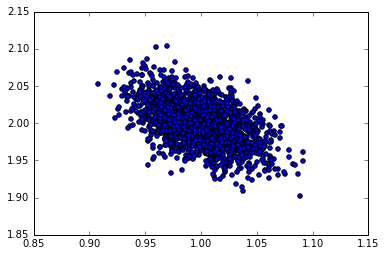

In [27]:
plt.scatter(rest[:,0],rest[:,1])